# On Catholicism, Eastern Orthodoxy, and Reddit.com

This survey evaluates the potential for predictively modeling the subreddits of two religious traditions (presently divided by schism but united by an older shared history) in comparison to one another, then examines the implications and further possibilities of these findings.

### Table of Contents:

- Part I: Introduction
- Part II: Preprocessing Summary
- Part III: EDA Summary
- Part IV: Predictive Models and Relevant Findings
- Part V: Conclusion

## Part I: Introduction

The Eastern and Western Churches, sharing many of the same traditions, beliefs, and doctrines, are--as the result of a nine-century schism--currently not in communion with one another. Thus, with all that they have in common, a great deal of time has passed, and they have diverged from one another in noticeable ways, from their respective understandings of authority and dogma, to more workaday things like fasting practices and Eucharistic formalities.

So just how much do they differ in their concerns and ways of communicating? (Or, how alike are they still?) In its own way, this project seeks to explore this question by way of statistical modeling, and to determine what details the modeling process might unearth. Additionally then, it touches on deeper questions: If machine learning can detect measures of separation between two conjoined religious traditions, could it also detect shifts within a single tradition as they take place in realtime? Could such models pick up on the diverging of preoccupations of different subgroups and tell us something about their cause? Can we predict the formation of reactionary movements and their subsequent impact on the larger tradition?

During the course of the project, many models were employed in relation to multiple forms of the text data available to optimize their accuracy in predicting the source of each post. Ultimately, two of these (a random forest model and a logistic regression model), were chosen as the strongest. More details on the findings below.

## Part II: Preprocessing Summary

The steps taken during preprocessing are recorded in greater detail in the `preprocessing` folder. The initial step involved scraping upwards of 5,000 posts for each subreddit and storing them in the `datasets` folder. To avoid allowing any server issues from making an already time-intensive project even more so, data from each subreddit was collected in two batches--see `preprocessing/01-collection.ipynb` and `02-collection-continued.ipynb`)--and combined into a single dataset from which to begin cleaning (`03-cleaning.ipynb`). This imvolved parsing the text data and applying various means to normalize it (`lower()`, etc.)

Finally the combined text of the title and post body for each entry was preprocessed in four different ways, and these four versions were all added to the main dataframe to be modeled separately for optimal results. For the record, they are as follows:

- the words of the combined title and post body, lemmatized
- the words of the combined title and post body, stemmed
- the words and potentially significant numbers of the combined title and post body, lemmatized
- the words and potentially significant numbers of the combined title and post body, stemmed

## Part III: Preprocessing Summary

As with preprocessing, more thorough treatment of the exploratory steps taken is included in the `preprocessing` folder. Some feature engineering allowed for the exploration of sentiment analysis in relation to various relevant phrases (`04-features.ipynb`), but it was difficult to interpret the results or their implications.

Additional exploratory analysis was done in relation to the frequency of certain phrases, and how this differed across subreddits depending on the phrase in question. The results were roughly what might be expected. The subreddit dedicated to Catholicism seemed to let more of their focus be occupied by locations and figures that have taken on more significance for the Western Church since the Great Schism (Lourdes, Pope Francis, Saint Thomas Aquinas, etc.), while Orthodoxy's subreddit saw more mentions of the Greek Fathers of the East (Saint Gregory of Nyssa, Maximus the Confessor, etc.) Occasionally, an idea or figure was shown to receive more mentions when adjusting for linguistic nuances of this or that tradition. That is, some ideas seem to be mentioned less often in the Orthodoxy subreddit until its Americanized phrase is replaced by the Greek one.

All of this is recounted (with visuals) in `05-eda.ipynb`. At the end of this notebook, the final dataset used for the modeling process (`main_final.csv`) is exported to the `datasets` folder.

## Part IV: Predictive Models and Relevant Findings

The modeling process for this project was extremely involved and time-intensive. For each of the four versions of the combined text data, the following models were trained:

- Logistic Regression
- Bagging
- AdaBoost
- Random Forest

For greater detail, the following notebooks are available in the `modeling` folder:

- `01-wds-dgts-lem.ipynb`
- `02-wds-lem.ipynb`
- `03-wds-dgts-stem.ipynb`
- `04-wds-stem.ipynb`

The names of these notebooks reflect the versions of the text being modeled. All models performed well above the baseline, scoring consistently above 80%. Also consistently, logistic regression and random forest models performed better than others, with logistic regression being most accurate of all.

A note on the final models below: Both models, even at the time of the deadline for this project are beset by some overfitting that further fine-tuning might remedy. Likewise, additional steps might be taken in adjusting the features included post-vectorization to help the training, cross-validation, and test scores converge. Such changes might even improve the final model's accuracy. Still, despite this overfit, the training and test scores for these two models are still the highest of any models trained in this process, and again, substantially higher than the baseline.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

First, the baseline score below. As we can see, just about a coin flip.

In [20]:
df = pd.read_csv('datasets/main_final.csv')

In [21]:
df['subreddit'].value_counts(normalize = True)

0    0.524423
1    0.475577
Name: subreddit, dtype: float64

#### Final Model 1: Random Forest

The best random forest model set its `n_estimators` to 250 and fit itself to the count-vectorized, stemmed, words-only version of the text data. 

Greater detail on this model, its findings, and its performance in comparison to other models can be found in the `randomforest.ipynb` file, itself in the `modeling` folder.

In [9]:
rf = pd.read_csv('datasets/randomforest.csv')

In [12]:
cm = confusion_matrix(rf['subreddit'], rf['predictions'])

Below, a brief output of the accuracy score and a confusion matrix to break down the results. Much higher than the baseline, and roughly similar in rate of guessing Catholicism and Orthodoxy correctly (and incorrectly). In the confusion matrix `1` represents the Catholicism subreddit and `0` represents the Orthodoxy subreddit.

In [19]:
round(accuracy_score(rf['subreddit'], rf['predictions']), 3)

0.836

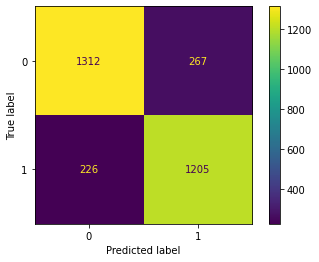

In [13]:
ConfusionMatrixDisplay(cm).plot();

This survey remains neutral on weighing the relevance of different types of correct classification and misclassification, so accuracy remains the sole arbiter of each model's success.

#### Final Model 2: Logistic Regression (BEST FIT)

Logistic regression models performed better than the other alternatives throughout the course of this survey, and the best of these was a model fit to stemmed words and relevant digits, vectorized according to term-frequency. More details are available in the `logreg.ipynb` notebook in the `modeling` folder, but the best results came by increasing the C-value with an L2 penalty.

In [22]:
lr = pd.read_csv('datasets/logreg.csv')

In [23]:
cm = confusion_matrix(lr['subreddit'], lr['predictions'])

Below, the final test score. It should be noted here (as is demonstrated in `logreg.ipynb` and `randomforest.ipynb`) that the cross-validation scores were much closer, as were the results throughout the duration of the survey. Logistic regression performed the best for each dataset, with random forests being a close second.

In [25]:
round(accuracy_score(lr['subreddit'], lr['predictions']), 3)

0.855

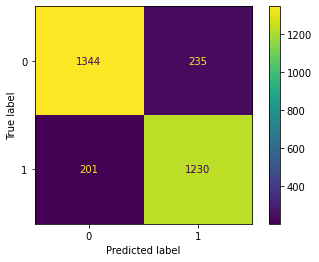

In [26]:
ConfusionMatrixDisplay(cm).plot();

Like the final random forest model, this logistic regression model suffers from a readily apparent overfit at the time of the project deadline. Further alterations to the datasets in question and to the hyper parameters might narrow the training/test data gap.

Still, the modeling process was an overall success, with not a single model failing to outperform the baseline.

The resulting logistic regression model confirmed much of what the exploratory process adumbrated:

<img src='./visuals/cath_coefs.png'>
<img src='./visuals/orth_coefs.png'>

Words signifying the subreddit's primary denomination of focus served as major predictors in terms of class probability, as did words associated with particular doctrines, practices and/or figures of each respective tradition.

## Part V: Conclusion

The central premise of the project--that classification of posts according to denomination (or at least according to subreddit) is to a high degree possible--has been confirmed by the final model. There may still be room for future revision to make this model even more accurate and to ease down some of the overfitting, but even at present, it performs well above the baseline. Further, it does so largely by picking up on themes and preoccupations on which these denominations diverge, shedding light for observers on the nature of these differences.

Such capacity could indeed be used in the future not merely to detect differences between two "similar" denominations, but between subgroups or subsects within a single denomination, and illustrate the ways that they might differ. In addition to being of interest to any adherents to such traditions, this might also allow for anticipating and understanding movements as they form, and the degree to which this or that subpopulation does or does not transform as a result.